In [2]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
sn.set()
sn.set_style("white")
sn.set_style("ticks")

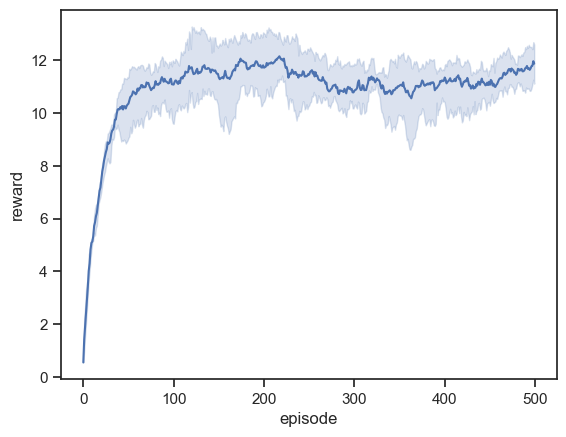

In [2]:
# reward plot
rewarddql0= []
with open(file="./logfile_ms8/2023-06-07 19-51-14-dql0.txt",mode="r") as f:
    lines = f.readlines()
    for c,line in enumerate(lines):
        line = line.strip()
        rew =  line.split(" ")[-1]
        # if c>380:
        #     rew = float(rew) * 0.9
        rewarddql0.append(float(rew))
f.close()

rewarddql1= []
with open(file="./logfile_ms8/2023-06-07 19-58-51-dql1.txt",mode="r") as f:
    lines = f.readlines()
    for c,line in enumerate(lines):
        line = line.strip()
        rew =  line.split(" ")[-1]
        # if c>380:
        #     rew = float(rew) * 0.9
        rewarddql1.append(float(rew))
f.close()

rewarddql1037= []
with open(file="./logfile_ms8/2023-06-07 20-08-55-dql1037.txt",mode="r") as f:
    lines = f.readlines()
    for c,line in enumerate(lines):
        line = line.strip()
        rew =  line.split(" ")[-1]
        # if c>380:
        #     rew = float(rew) * 0.9
        rewarddql1037.append(float(rew))
f.close()

rewardsdql=np.concatenate((rewarddql0,rewarddql1,rewarddql1037)) # 合并数组
episode1=range(len(rewarddql0))
episode2=range(len(rewarddql1))
episode3=range(len(rewarddql1037))
episode=np.concatenate((episode1,episode2,episode3))
sn.lineplot(x=episode,y=rewardsdql)
plt.xlabel("episode")
plt.ylabel("reward")
plt.show()

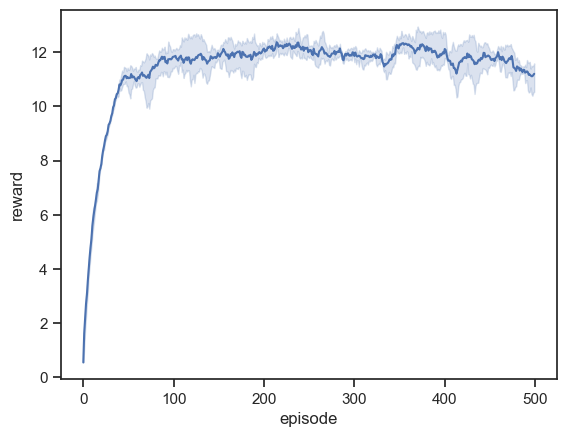

In [3]:
rewardmb0= []
with open(file="./logfile_ms8/2023-06-07 19-51-44-mb0.txt",mode="r") as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardmb0.append(float(rew))
f.close()

rewardmb1= []
with open(file="./logfile_ms8/2023-06-07 19-59-26-mb1.txt",mode="r") as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardmb1.append(float(rew))
f.close()

rewardmb1037= []
with open(file="./logfile_ms8/2023-06-07 20-09-30-mb1037.txt",mode="r") as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardmb1037.append(float(rew))
f.close()

rewardsmb=np.concatenate((rewardmb0,rewardmb1,rewardmb1037)) # 合并数组
episode1=range(len(rewardmb0))
episode2=range(len(rewardmb1))
episode3=range(len(rewardmb1037))
episode=np.concatenate((episode1,episode2,episode3))
sn.lineplot(x=episode,y=rewardsmb)
plt.xlabel("episode")
plt.ylabel("reward")
plt.show()

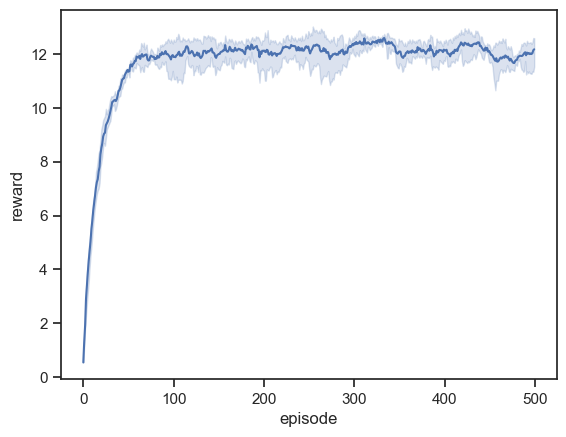

In [4]:

rewardrms0= []
with open(file="./logfile_ms8/2023-06-07 19-52-43-rms0.txt",mode="r") as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardrms0.append(float(rew))
f.close()

rewardrms1= []
with open(file="./logfile_ms8/2023-06-07 20-00-32-rms1.txt",mode="r") as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardrms1.append(float(rew))
f.close()

rewardrms1037= []
with open(file="./logfile_ms8/2023-06-07 20-10-42-rms1037.txt",mode="r") as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardrms1037.append(float(rew))
f.close()

rewardsrms=np.concatenate((rewardrms0,rewardrms1,rewardrms1037)) # 合并数组
episode1=range(len(rewardrms0))
episode2=range(len(rewardrms1))
episode3=range(len(rewardrms1037))
episode=np.concatenate((episode1,episode2,episode3))
sn.lineplot(x=episode,y=rewardsrms)
plt.xlabel("episode")
plt.ylabel("reward")
plt.show()

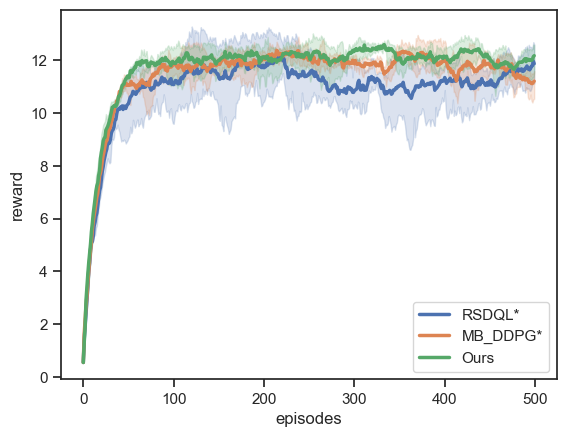

In [5]:

# 整合
sn.lineplot(x=episode,y=rewardsdql,linewidth = 2.5,label = "RSDQL*")
sn.lineplot(x=episode,y=rewardsmb,linewidth = 2.5,label = "MB_DDPG*")
sn.lineplot(x=episode,y=rewardsrms,linewidth = 2.5,label = "Ours")
plt.xlabel("episodes")
plt.ylabel("reward")
plt.show()

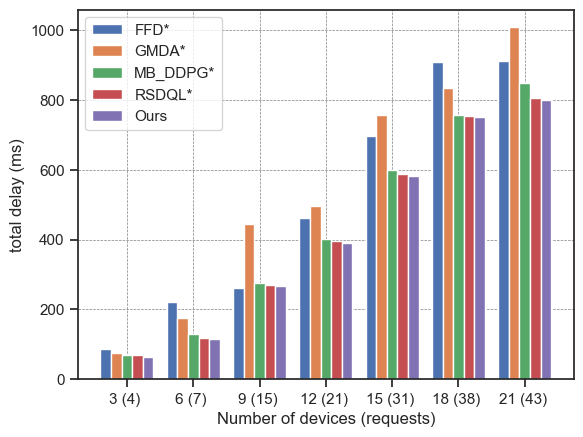

In [17]:
# 请求时延plot node=4,ms=10,seed=1037
device = [3,6,9,12,15,18,21] # 终端数目
chains = [4,7,15,21,31,38,43] # 产生的请求流数目

delay_rms = [63.5972,115.0001,265.6933,389.0456,580.7693,749.8459,799.8628]
delay_mb = [69.6724,129.1780,275.7958,400.4898,597.8789,756.3495,847.4519]
delay_dql = [70.0570,118.4898,270.5300,396.8463,588.6673,752.8694,806.5733]
delay_ffd = [86.42,220.77,261.75,462.77,695.61,907.46,910.77]
delay_gmda = [75.10,175.62,445.52,496.04,758.15,834.34,1008.45]

xlabel = ["3 (4) ","6 (7) ","9 (15) ","12 (21) ","15 (31) ","18 (38) ","21 (43) "]

x = np.arange(len(device))
total_width, n = 0.8,5
width = total_width / n
xticks = x - (total_width-width) / 5

plt.figure()
plt.bar(xticks-2*width,delay_ffd,width=width,label="FFD*")
plt.bar(xticks-width,delay_gmda,width=width,label="GMDA*")
plt.bar(xticks,delay_mb,width=width,label = "MB_DDPG*")
plt.bar(xticks+width,delay_dql,width=width,label = "RSDQL*")
plt.bar(xticks+2*width,delay_rms,width=width,label = "Ours")

plt.xticks(xticks,xlabel)
plt.legend(loc="upper left")
plt.xlabel("Number of devices (requests)")
plt.ylabel("total delay (ms)")
plt.grid(True,linestyle="--",color="gray",linewidth="0.5",axis="both")
plt.show()

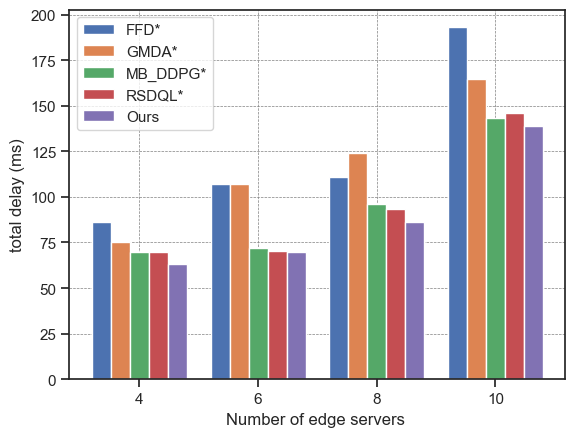

In [18]:
# 请求时延plot device=3,ms=10
nodes = [4,6,8,10]
delay_rms = [63.4336,70.0136,86.4508,138.6318]
delay_mb = [69.6724,72.0457,95.9484,143.3053]
delay_dql = [70.0570,70.5,93.1673,146.1755]
delay_ffd = [86.42,106.93,110.96,193.04]
delay_gmda = [75.10,107.07,124.22,164.62]

x = np.arange(len(nodes))
total_width, n = 0.8,5
width = total_width / n
xticks = x - (total_width-width) / 5

plt.figure()
plt.bar(xticks-2*width,delay_ffd,width=width,label="FFD*")
plt.bar(xticks-width,delay_gmda,width=width,label="GMDA*")
plt.bar(xticks,delay_mb,width=width,label = "MB_DDPG*")
plt.bar(xticks+width,delay_dql,width=width,label = "RSDQL*")
plt.bar(xticks+2*width,delay_rms,width=width,label = "Ours")
plt.xticks(xticks,nodes)
plt.legend(loc="upper left")
plt.xlabel("Number of edge servers ")
plt.ylabel("total delay (ms)")
plt.grid(True,linestyle="--",color="gray",linewidth="0.5",axis="both")
plt.show()

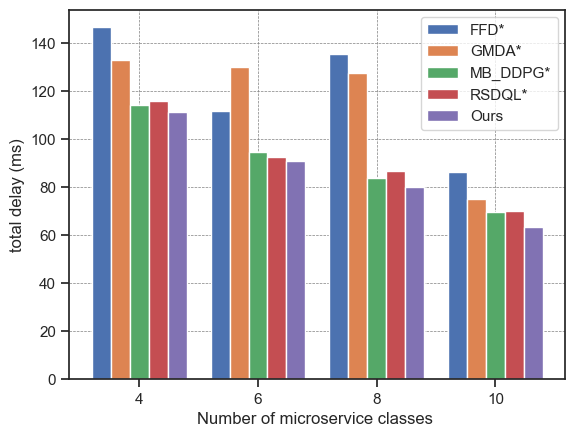

In [20]:
# 请求时延plot device=3,node=4
ms = [4,6,8,10]
delay_rms = [111.0841,90.9349,80.1338,63.4336]
delay_mb = [114.0494,94.6250,83.6794,69.6724]
delay_dql = [115.9104,92.6685,86.5543,70.0570]
delay_ffd = [146.55,111.79,135.39,86.42]
delay_gmda = [132.95,130.19,127.53,75.10]

x = np.arange(len(ms))
total_width, n = 0.8,5
width = total_width / n
xticks = x - (total_width-width) / 5

plt.figure()
plt.bar(xticks-2*width,delay_ffd,width=width,label="FFD*")
plt.bar(xticks-width,delay_gmda,width=width,label="GMDA*")
plt.bar(xticks,delay_mb,width=width,label = "MB_DDPG*")
plt.bar(xticks+width,delay_dql,width=width,label = "RSDQL*")
plt.bar(xticks+2*width,delay_rms,width=width,label = "Ours")
plt.xticks(xticks,ms)
plt.legend(loc="upper right")
plt.xlabel("Number of microservice classes ")
plt.ylabel("total delay (ms)")
plt.grid(True,linestyle="--",color="gray",linewidth="0.5",axis="both")
plt.show()

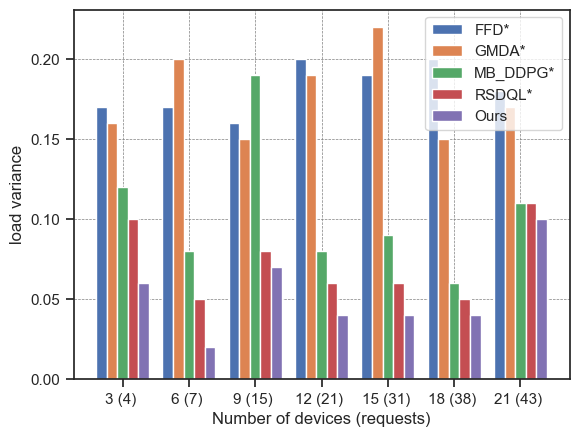

In [6]:
# load variance node=4,ms=10
device = [3,6,9,12,15,18,21] # 终端数目
chains = [4,7,15,21,31,38,43] # 产生的请求流数目

load_rms = [0.06,0.02,0.07,0.04,0.04,0.04,0.10]
load_mb = [0.12,0.08,0.19,0.08,0.09,0.06,0.11]
load_dql = [0.10,0.05,0.08,0.06,0.06,0.05,0.11]
load_ffd = [0.17,0.17,0.16,0.20,0.19,0.20,0.18]
load_gmda = [0.16,0.20,0.15,0.19,0.22,0.15,0.17]

xlabel = ["3 (4) ","6 (7) ","9 (15) ","12 (21) ","15 (31) ","18 (38) ","21 (43) "]

x = np.arange(len(device))
total_width, n = 0.8,5
width = total_width / n
xticks = x - (total_width-width) / 5

plt.figure()
plt.bar(xticks-2*width,load_ffd,width=width,label="FFD*")
plt.bar(xticks-width,load_gmda,width=width,label="GMDA*")
plt.bar(xticks,load_mb,width=width,label = "MB_DDPG*")
plt.bar(xticks+width,load_dql,width=width,label = "RSDQL*")
plt.bar(xticks+2*width,load_rms,width=width,label = "Ours")
plt.xticks(xticks,xlabel)
plt.legend(loc="upper right")
plt.xlabel("Number of devices (requests)")
plt.ylabel("load variance")
plt.grid(True,linestyle="--",color="gray",linewidth="0.5",axis="both")
plt.show()

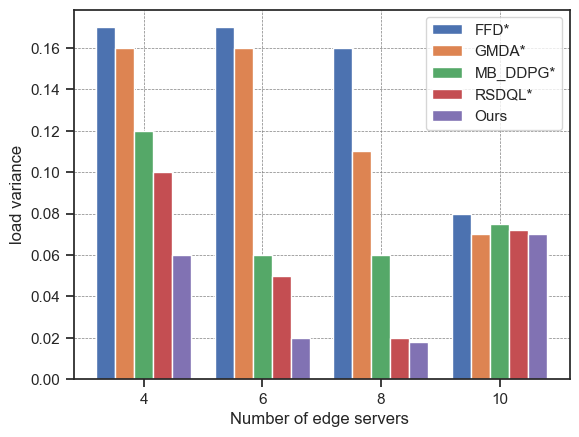

In [19]:
# load variiance dev=3,ms=10
nodes = [4,6,8,10]
load_rms = [0.06,0.02,0.018,0.07]
load_mb = [0.12,0.06,0.06,0.075]
load_dql = [0.10,0.05,0.02,0.072]
load_ffd = [0.17,0.17,0.16,0.08]
load_gmda = [0.16,0.16,0.11,0.07]

x = np.arange(len(nodes))
total_width, n = 0.8,5
width = total_width / n
xticks = x - (total_width-width) / 5

plt.figure()
plt.bar(xticks-2*width,load_ffd,width=width,label="FFD*")
plt.bar(xticks-width,load_gmda,width=width,label="GMDA*")
plt.bar(xticks,load_mb,width=width,label = "MB_DDPG*")
plt.bar(xticks+width,load_dql,width=width,label = "RSDQL*")
plt.bar(xticks+2*width,load_rms,width=width,label = "Ours")
plt.xticks(xticks,nodes)
plt.legend(loc="upper right")
plt.xlabel("Number of edge servers ")
plt.ylabel("load variance")
plt.grid(True,linestyle="--",color="gray",linewidth="0.5",axis="both")
plt.show()

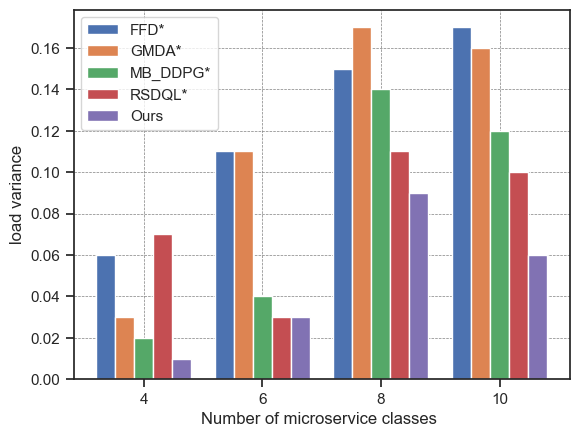

In [21]:
# load variiance dev=3,node=4
ms = [4,6,8,10]
load_rms = [0.01,0.03,0.09,0.06]
load_mb = [0.02,0.04,0.14,0.12]
load_dql = [0.07,0.03,0.11,0.10]
load_ffd = [0.06,0.11,0.15,0.17]
load_gmda = [0.03,0.11,0.17,0.16]

x = np.arange(len(nodes))
total_width, n = 0.8,5
width = total_width / n
xticks = x - (total_width-width) / 5

plt.figure()
plt.bar(xticks-2*width,load_ffd,width=width,label="FFD*")
plt.bar(xticks-width,load_gmda,width=width,label="GMDA*")
plt.bar(xticks,load_mb,width=width,label = "MB_DDPG*")
plt.bar(xticks+width,load_dql,width=width,label = "RSDQL*")
plt.bar(xticks+2*width,load_rms,width=width,label = "Ours")
plt.xticks(xticks,nodes)
plt.legend(loc="upper left")
plt.xlabel("Number of microservice classes ")
plt.ylabel("load variance")
plt.grid(True,linestyle="--",color="gray",linewidth="0.5",axis="both")
plt.show()

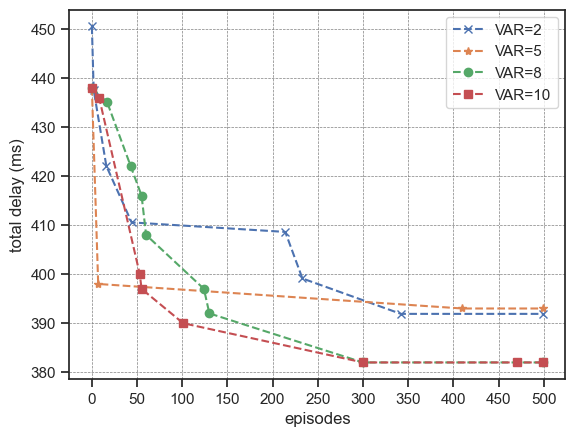

In [15]:
# var 变量的消融实验 user 10, ms 10,node 8
x_axisv2 = [0,2,16,44,214,233,342,499]
y_axisv2 = [450.4980,437.5409,422.0503,410.5513,408.6115,399.1213,391.9020,391.9020]

x_axisv5 = [0,7,410,499]
y_axisv5 = [438,398,393,393]

x_axisv8 = [0,17,43,55,60,124,130,300,499]
y_axisv8 = [438,435,422,416,408,397,392,382,382]

x_axisv10 = [0,8,53,55,101,300,471,499]
y_axisv10 = [438,436,400,397,390,382,382,382]

xstick = [0,50,100,150,200,250,300,350,400,450,500]
plt.figure()
plt.plot(x_axisv2,y_axisv2,linewidth=1.5,linestyle="--",marker="x",label="VAR=2")
plt.plot(x_axisv5,y_axisv5,linewidth=1.5,linestyle="--",marker="*",label="VAR=5")
plt.plot(x_axisv8,y_axisv8,linewidth=1.5,linestyle="--",marker="o",label="VAR=8")
plt.plot(x_axisv10,y_axisv10,linewidth=1.5,linestyle="--",marker="s",label="VAR=10")
plt.xticks(xstick)
plt.ylabel("total delay (ms)")
plt.xlabel("episodes")
plt.legend(loc="upper right")
plt.grid(True,linestyle="--",color="gray",linewidth="0.5",axis="both")
plt.show()

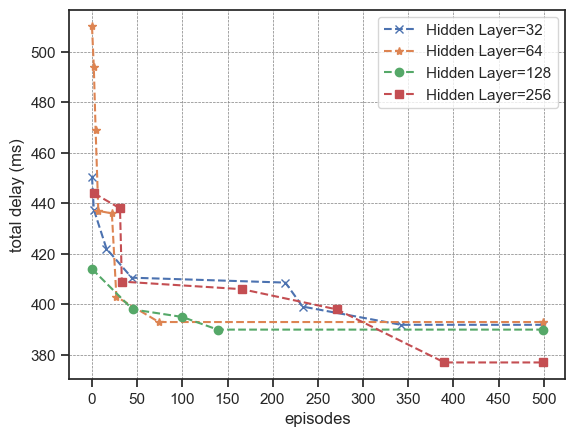

In [3]:
x_axish32 = [0,2,16,44,214,233,342,499]
y_axish32 = [450.4980,437.5409,422.0503,410.5513,408.6115,399.1213,391.9020,391.9020]

x_axish64 = [0,2,4,7,22,27,74,499]
y_axish64 = [510,494,469,437,436,403,393,393]

x_axish128 = [0,45,100,139,499]
y_axish128 = [414,398,395,390,390]

x_axish256 = [2,31,33,166,271,390,499]
y_axish256 = [444,438,409,406,398,377,377]

xstick = [0,50,100,150,200,250,300,350,400,450,500]
plt.figure()
plt.plot(x_axish32,y_axish32,linewidth=1.5,linestyle="--",marker="x",label="Hidden Layer=32")
plt.plot(x_axish64,y_axish64,linewidth=1.5,linestyle="--",marker="*",label="Hidden Layer=64")
plt.plot(x_axish128,y_axish128,linewidth=1.5,linestyle="--",marker="o",label="Hidden Layer=128")
plt.plot(x_axish256,y_axish256,linewidth=1.5,linestyle="--",marker="s",label="Hidden Layer=256")
plt.xticks(xstick)
plt.ylabel("total delay (ms)")
plt.xlabel("episodes")
plt.legend(loc="upper right")
plt.grid(True,linestyle="--",color="gray",linewidth="0.5",axis="both")
plt.show()

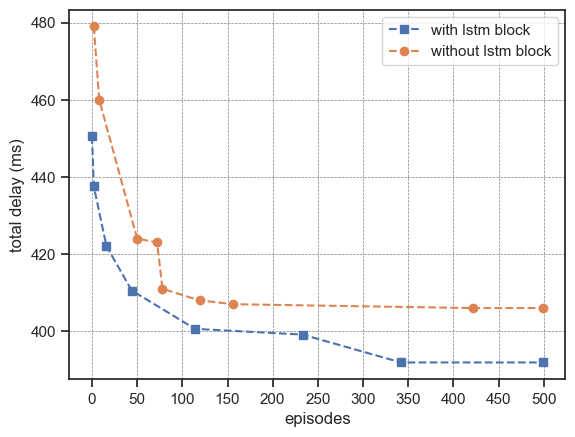

In [9]:
x_axisrms = [0,2,16,44,114,233,342,499]
y_axisrms = [450.4980,437.5409,422.0503,410.5513,400.6115,399.1213,391.9020,391.9020]

# h 128
# x_axis = [2,3,30,52,66,330,499]
# y_axis = [468,422,414,410,391,385,385]

x_axis = [2,8,50,72,78,119,156,422,499]
y_axis = [479,460,424,423,411,408,407,406,406]

xstick = [0,50,100,150,200,250,300,350,400,450,500]
plt.figure()
plt.plot(x_axisrms,y_axisrms,linewidth=1.5,linestyle="--",marker="s",label="with lstm block")
plt.plot(x_axis,y_axis,linewidth=1.5,linestyle="--",marker="o",label="without lstm block")
plt.xticks(xstick)
plt.ylabel("total delay (ms)")
plt.xlabel("episodes")
plt.legend(loc="upper right")
plt.grid(True,linestyle="--",color="gray",linewidth="0.5",axis="both")
plt.show()


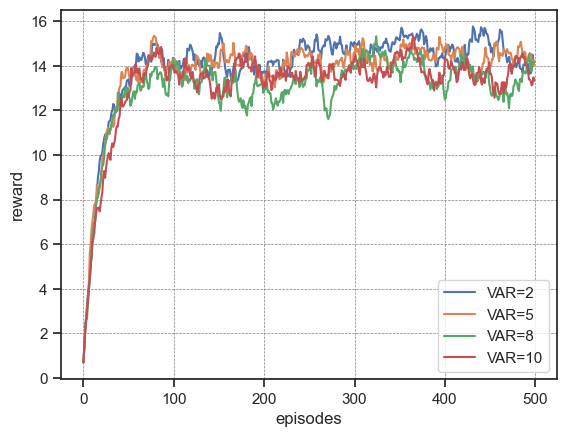

In [10]:

rewardvar2= []
with open(file="./VAR/2023-12-16 15-09-12-var2.txt",mode="r") as f:
    lines = f.readlines()
    count = 0
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardvar2.append(float(rew))
        count+=1
        if count>=500:
            break
f.close()

rewardvar5= []
with open(file="./VAR/2023-12-16 15-26-44-var5.txt",mode="r") as f:
    lines = f.readlines()
    count = 0
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardvar5.append(float(rew))
        count+=1
        if count>=500:
            break
f.close()

rewardvar8= []
with open(file="./VAR/2023-12-16 15-51-31-var8.txt",mode="r") as f:
    lines = f.readlines()
    count = 0
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardvar8.append(float(rew))
        count+=1
        if count>=500:
            break
f.close()

rewardvar10= []
with open(file="./VAR/2023-12-16 16-05-41-var10.txt",mode="r") as f:
    lines = f.readlines()
    count = 0
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardvar10.append(float(rew))
        count+=1
        if count>=500:
            break
f.close()

plt.figure()
plt.plot(rewardvar2,linewidth = 1.5,label = "VAR=2")
plt.plot(rewardvar5,linewidth = 1.5,label = "VAR=5")
plt.plot(rewardvar8,linewidth = 1.5,label = "VAR=8")
plt.plot(rewardvar10,linewidth = 1.5,label = "VAR=10")
plt.ylabel("reward")
plt.xlabel("episodes")
plt.legend(loc="lower right")
plt.grid(True,linestyle="--",color="gray",linewidth="0.5",axis="both")
plt.show()

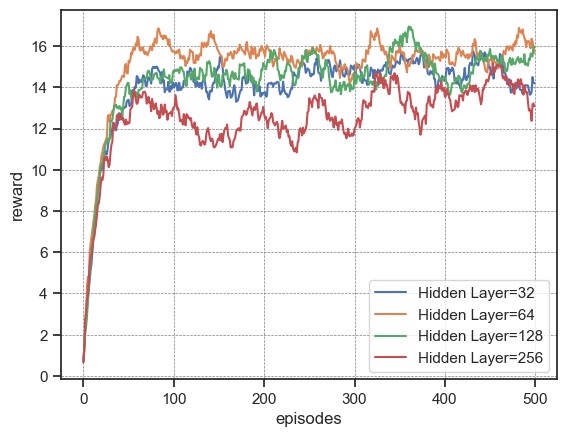

In [11]:
rewardh32= []
with open(file="./HiddenLayer/2023-12-16 15-09-12-hidden32.txt",mode="r") as f:
    lines = f.readlines()
    count = 0
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardh32.append(float(rew))
        count+=1
        if count>=500:
            break
f.close()

rewardh64= []
with open(file="./HiddenLayer/2023-12-16 21-42-02-hidden64.txt",mode="r") as f:
    lines = f.readlines()
    count = 0
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardh64.append(float(rew))
        count+=1
        if count>=500:
            break
f.close()

rewardh128= []
with open(file="./HiddenLayer/2023-12-16 21-58-37-hidden128.txt",mode="r") as f:
    lines = f.readlines()
    count = 0
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardh128.append(float(rew))
        count+=1
        if count>=500:
            break
f.close()

rewardh256= []
with open(file="./HiddenLayer/2023-12-16 22-13-30-hidden256.txt",mode="r") as f:
    lines = f.readlines()
    count = 0
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardh256.append(float(rew))
        count+=1
        if count>=500:
            break
f.close()

plt.figure()
plt.plot(rewardh32,linewidth = 1.5,label = "Hidden Layer=32")
plt.plot(rewardh64,linewidth = 1.5,label = "Hidden Layer=64")
plt.plot(rewardh128,linewidth = 1.5,label = "Hidden Layer=128")
plt.plot(rewardh256,linewidth = 1.5,label = "Hidden Layer=256")
plt.ylabel("reward")
plt.xlabel("episodes")
plt.legend(loc="lower right")
plt.grid(True,linestyle="--",color="gray",linewidth="0.5",axis="both")
plt.show()

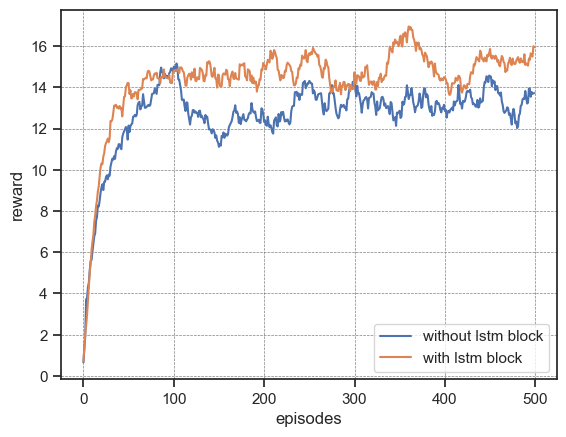

In [14]:
rewardwithout= []
with open(file="./rms-lstm/2023-12-17 15-30-04-without.txt",mode="r") as f:
    lines = f.readlines()
    count = 0
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardwithout.append(float(rew))
        count+=1
        if count>=500:
            break
f.close()

rewardwith= []
with open(file="./rms-lstm/2023-12-16 21-58-37-with.txt",mode="r") as f:
    lines = f.readlines()
    count = 0
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardwith.append(float(rew))
        count+=1
        if count>=500:
            break
f.close()

plt.figure()
plt.plot(rewardwithout,linewidth = 1.5,label = "without lstm block")
plt.plot(rewardwith,linewidth = 1.5,label = "with lstm block")
plt.ylabel("reward")
plt.xlabel("episodes")
plt.legend(loc="lower right")
plt.grid(True,linestyle="--",color="gray",linewidth="0.5",axis="both")
plt.show()